<a href="https://colab.research.google.com/github/steendy2/Python-projects/blob/main/Finance_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Mount Google Drive
drive.mount('/content/drive')

# File paths
DATA_FILE = '/content/drive/My Drive/Colab Notebooks/Pydroid3Projects/expenses.csv'
SUMMARY_FILE = '/content/drive/My Drive/Colab Notebooks/Pydroid3Projects/finance_summary.txt'
PLOT_FILE = '/content/drive/My Drive/Colab Notebooks/Pydroid3Projects/spending_plot.png'

# Initialize CSV if it doesn't exist
if not os.path.exists(DATA_FILE):
    pd.DataFrame(columns=['date', 'type', 'category', 'amount', 'description']).to_csv(DATA_FILE, index=False)
    print(f"Created {DATA_FILE}")

print("Setup complete!")

Mounted at /content/drive
Created /content/drive/My Drive/Colab Notebooks/Pydroid3Projects/expenses.csv
Setup complete!


In [2]:
def add_entry(date, entry_type, category, amount, description):
    """Add an income or expense entry to CSV."""
    try:
        amount = float(amount)
        if amount < 0:
            raise ValueError("Amount must be positive.")
        # Adjust amount for expenses
        if entry_type.lower() == 'expense':
            amount = -amount
        new_entry = pd.DataFrame({
            'date': [date],
            'type': [entry_type.lower()],
            'category': [category],
            'amount': [amount],
            'description': [description]
        })
        new_entry.to_csv(DATA_FILE, mode='a', header=False, index=False)
        print(f"Added {entry_type}: {category} - {amount}")
    except ValueError as e:
        print(f"Error: {e}")

def view_entries():
    """View all entries."""
    df = pd.read_csv(DATA_FILE)
    if df.empty:
        print("No entries found.")
    else:
        print("\nAll Entries:")
        print(df.to_string(index=False))

def edit_entry(index, date, entry_type, category, amount, description):
    """Edit an entry by index."""
    try:
        df = pd.read_csv(DATA_FILE)
        if index < 0 or index >= len(df):
            raise IndexError("Invalid index.")
        amount = float(amount)
        if amount < 0:
            raise ValueError("Amount must be positive.")
        if entry_type.lower() == 'expense':
            amount = -amount
        df.iloc[index] = [date, entry_type.lower(), category, amount, description]
        df.to_csv(DATA_FILE, index=False)
        print(f"Edited entry at index {index}")
    except (ValueError, IndexError) as e:
        print(f"Error: {e}")

def delete_entry(index):
    """Delete an entry by index."""
    try:
        df = pd.read_csv(DATA_FILE)
        if index < 0 or index >= len(df):
            raise IndexError("Invalid index.")
        df = df.drop(index).reset_index(drop=True)
        df.to_csv(DATA_FILE, index=False)
        print(f"Deleted entry at index {index}")
    except IndexError as e:
        print(f"Error: {e}")

def analyze_finances():
    """Analyze total balance and spending by category."""
    df = pd.read_csv(DATA_FILE)
    if df.empty:
        return {"message": "No data to analyze."}
    total_income = df[df['type'] == 'income']['amount'].sum()
    total_expenses = -df[df['type'] == 'expense']['amount'].sum()
    balance = total_income + total_expenses
    category_summary = df.groupby('category')['amount'].sum().to_dict()
    return {
        'Total Income': total_income,
        'Total Expenses': total_expenses,
        'Balance': balance,
        'Category Breakdown': category_summary
    }

def visualize_finances():
    """Visualize spending by category and type."""
    df = pd.read_csv(DATA_FILE)
    if df.empty:
        print("No data to visualize.")
        return

    sns.set_style("whitegrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Bar Plot: Spending by Category
    category_totals = df.groupby('category')['amount'].sum().abs()
    ax1.bar(category_totals.index, category_totals.values, color='skyblue')
    ax1.set_title('Spending by Category')
    ax1.set_xlabel('Category')
    ax1.set_ylabel('Amount (KES)')
    ax1.tick_params(axis='x', rotation=45)

    # Pie Chart: Income vs Expenses
    type_totals = [df[df['type'] == 'income']['amount'].sum(), -df[df['type'] == 'expense']['amount'].sum()]
    ax2.pie(type_totals, labels=['Income', 'Expenses'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
    ax2.set_title('Income vs Expenses')

    plt.tight_layout()
    plt.savefig(PLOT_FILE, dpi=150)
    plt.show()
    print(f"Plot saved to {PLOT_FILE}")

def save_summary(summary):
    """Save analysis summary to TXT."""
    try:
        with open(SUMMARY_FILE, 'w', encoding='utf-8') as file:
            file.write("Personal Finance Report\n")
            file.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M')}\n\n")
            for key, value in summary.items():
                if key == 'Category Breakdown':
                    file.write("\nCategory Breakdown:\n")
                    for cat, amt in value.items():
                        file.write(f"{cat}: {amt:.2f} KES\n")
                else:
                    file.write(f"{key}: {value:.2f} KES\n")
        print(f"Summary saved to {SUMMARY_FILE}")
    except Exception as e:
        print(f"Error saving: {e}")


--- Personal Finance Tracker ---
1. Add Income/Expense
2. View Entries
3. Edit Entry
4. Delete Entry
5. Analyze Finances
6. Visualize Finances
7. Save Summary
8. Exit
Enter choice (1-8): 1
Date (YYYY-MM-DD): 2025_09_16
Type (income/expense): Income
Category (e.g., Food, Salary): Salary
Amount (KES): 5000
Description: Partially used 500 for food and 400 for data 
Added income: Salary - 5000.0

--- Personal Finance Tracker ---
1. Add Income/Expense
2. View Entries
3. Edit Entry
4. Delete Entry
5. Analyze Finances
6. Visualize Finances
7. Save Summary
8. Exit
Enter choice (1-8): 5

Financial Summary:
Total Income: 10000.00 KES
Total Expenses: -0.00 KES
Balance: 10000.00 KES

Category Breakdown:
Salary: 10000.00 KES

--- Personal Finance Tracker ---
1. Add Income/Expense
2. View Entries
3. Edit Entry
4. Delete Entry
5. Analyze Finances
6. Visualize Finances
7. Save Summary
8. Exit
Enter choice (1-8): 6


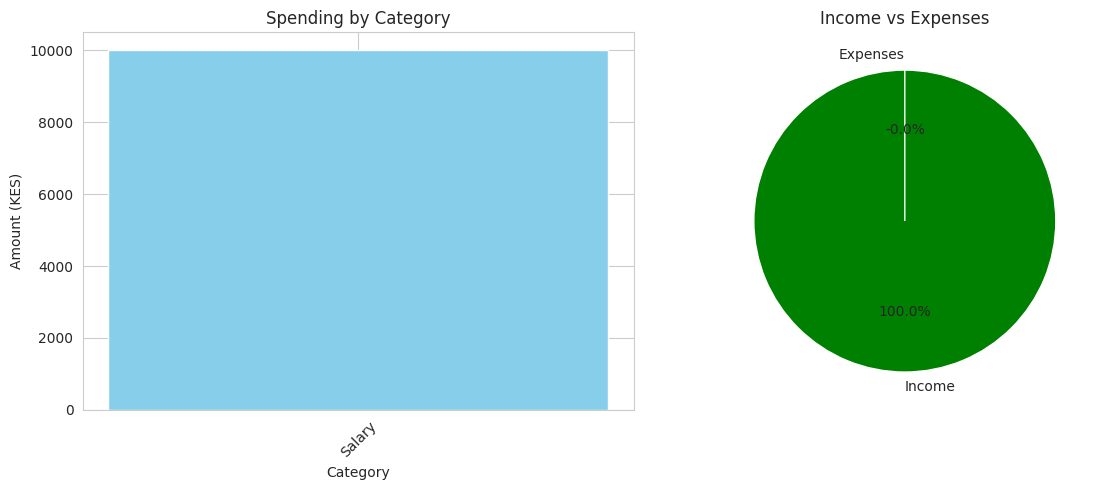

Plot saved to /content/drive/My Drive/Colab Notebooks/Pydroid3Projects/spending_plot.png

--- Personal Finance Tracker ---
1. Add Income/Expense
2. View Entries
3. Edit Entry
4. Delete Entry
5. Analyze Finances
6. Visualize Finances
7. Save Summary
8. Exit
Enter choice (1-8): 7
Summary saved to /content/drive/My Drive/Colab Notebooks/Pydroid3Projects/finance_summary.txt

--- Personal Finance Tracker ---
1. Add Income/Expense
2. View Entries
3. Edit Entry
4. Delete Entry
5. Analyze Finances
6. Visualize Finances
7. Save Summary
8. Exit
Enter choice (1-8): 8
Exiting. Thanks for using the Finance Tracker!


In [13]:
def main_menu():
    """CLI interface for the finance tracker."""
    while True:
        print("\n--- Personal Finance Tracker ---")
        print("1. Add Income/Expense")
        print("2. View Entries")
        print("3. Edit Entry")
        print("4. Delete Entry")
        print("5. Analyze Finances")
        print("6. Visualize Finances")
        print("7. Save Summary")
        print("8. Exit")

        choice = input("Enter choice (1-8): ").strip()

        if choice == '1':
            date = input("Date (YYYY-MM-DD): ")
            entry_type = input("Type (income/expense): ").lower()
            if entry_type not in ['income', 'expense']:
                print("Invalid type. Use 'income' or 'expense'.")
                continue
            category = input("Category (e.g., Food, Salary): ")
            amount = input("Amount (KES): ")
            description = input("Description: ")
            add_entry(date, entry_type, category, amount, description)

        elif choice == '2':
            view_entries()

        elif choice == '3':
            view_entries()
            index = input("Enter index to edit: ")
            try:
                index = int(index)
                date = input("New Date (YYYY-MM-DD): ")
                entry_type = input("New Type (income/expense): ").lower()
                if entry_type not in ['income', 'expense']:
                    print("Invalid type.")
                    continue
                category = input("New Category: ")
                amount = input("New Amount (KES): ")
                description = input("New Description: ")
                edit_entry(index, date, entry_type, category, amount, description)
            except ValueError:
                print("Invalid index or amount.")

        elif choice == '4':
            view_entries()
            try:
                index = int(input("Enter index to delete: "))
                delete_entry(index)
            except ValueError:
                print("Invalid index.")

        elif choice == '5':
            summary = analyze_finances()
            if 'message' in summary:
                print(summary['message'])
            else:
                print("\nFinancial Summary:")
                for key, value in summary.items():
                    if key == 'Category Breakdown':
                        print("\nCategory Breakdown:")
                        for cat, amt in value.items():
                            print(f"{cat}: {amt:.2f} KES")
                    else:
                        print(f"{key}: {value:.2f} KES")

        elif choice == '6':
            visualize_finances()

        elif choice == '7':
            summary = analyze_finances()
            if 'message' not in summary:
                save_summary(summary)

        elif choice == '8':
            print("Exiting. Thanks for using the Finance Tracker!")
            break
        else:
            print("Invalid choice. Try again.")

main_menu()

In [14]:
import plotly.express as px
def visualize_interactive():
    df = pd.read_csv(DATA_FILE)
    fig = px.pie(df, values=df['amount'].abs(), names='category', title='Spending by Category')
    fig.write_html('/content/drive/My Drive/Colab Notebooks/Pydroid3Projects/spending_interactive.html')
    fig.show()
# Add to menu: option 9

In [15]:
def check_budget():
    df = pd.read_csv(DATA_FILE)
    total_expenses = -df[df['type'] == 'expense']['amount'].sum()
    if total_expenses > 10000:  # Example threshold
        print("Warning: Expenses exceed 10,000 KES!")

In [16]:
!pip install reportlab
from reportlab.pdfgen import canvas
def export_pdf():
    c = canvas.Canvas('/content/drive/My Drive/Colab Notebooks/Pydroid3Projects/finance_report.pdf')
    c.drawString(100, 750, "Personal Finance Report")
    summary = analyze_finances()
    y = 700
    for key, value in summary.items():
        c.drawString(100, y, f"{key}: {value}")
        y -= 20
    c.save()